In [36]:
# 📦 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')


In [37]:
# 📂 Load KC1 dataset
df_kc1 = pd.read_csv('../data/KC1.csv')
df_kc1['defects'] = df_kc1['defects'].astype(int)

# 📋 Prepare features and target
X_kc1 = df_kc1.drop('defects', axis=1)
y_kc1 = df_kc1['defects']

# 📏 Scale features
scaler_kc1 = StandardScaler()
X_scaled_kc1 = scaler_kc1.fit_transform(X_kc1)

# 🔀 Split into train/test
X_train_kc1, X_test_kc1, y_train_kc1, y_test_kc1 = train_test_split(
    X_scaled_kc1, y_kc1, test_size=0.2, stratify=y_kc1, random_state=42
)

# 🎯 Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote_kc1, y_train_smote_kc1 = smote.fit_resample(X_train_kc1, y_train_kc1)

print("✅ KC1 dataset loaded, scaled, split, and SMOTE-balanced!")


✅ KC1 dataset loaded, scaled, split, and SMOTE-balanced!


In [38]:
# 📂 Load JM1 dataset
df_jm1 = pd.read_csv('../data/JM1.csv')
df_jm1['defects'] = df_jm1['defects'].astype(int)

# 📋 Prepare features and target
X_jm1 = df_jm1.drop('defects', axis=1)
y_jm1 = df_jm1['defects']

# 📏 Scale features
scaler_jm1 = StandardScaler()
X_scaled_jm1 = scaler_jm1.fit_transform(X_jm1)

# 🔀 Split into train/test
X_train_jm1, X_test_jm1, y_train_jm1, y_test_jm1 = train_test_split(
    X_scaled_jm1, y_jm1, test_size=0.2, stratify=y_jm1, random_state=42
)

# 🎯 Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote_jm1, y_train_smote_jm1 = smote.fit_resample(X_train_jm1, y_train_jm1)

print("✅ JM1 dataset loaded, scaled, split, and SMOTE-balanced!")


✅ JM1 dataset loaded, scaled, split, and SMOTE-balanced!


In [39]:
# ✅ Default models for JM1

logreg_jm1_default = LogisticRegression(max_iter=1000, random_state=42)
logreg_jm1_default.fit(X_train_smote_jm1, y_train_smote_jm1)

rf_jm1_default = RandomForestClassifier(random_state=42)
rf_jm1_default.fit(X_train_smote_jm1, y_train_smote_jm1)

xgb_jm1_default = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_jm1_default.fit(X_train_smote_jm1, y_train_smote_jm1)

ann_jm1_default = MLPClassifier(max_iter=500, random_state=42)
ann_jm1_default.fit(X_train_smote_jm1, y_train_smote_jm1)

print("✅ All default models retrained successfully!")


✅ All default models retrained successfully!


In [40]:
# ✅ Default models for KC1

logreg_kc1_default = LogisticRegression(max_iter=1000, random_state=42)
logreg_kc1_default.fit(X_train_smote_kc1, y_train_smote_kc1)

rf_kc1_default = RandomForestClassifier(random_state=42)
rf_kc1_default.fit(X_train_smote_kc1, y_train_smote_kc1)

xgb_kc1_default = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_kc1_default.fit(X_train_smote_kc1, y_train_smote_kc1)

ann_kc1_default = MLPClassifier(max_iter=500, random_state=42)
ann_kc1_default.fit(X_train_smote_kc1, y_train_smote_kc1)

print("✅ All default models retrained successfully!")


✅ All default models retrained successfully!


In [41]:
# ✅ Tuned models for KC1

rf_kc1_tuned = RandomForestClassifier(n_estimators=300, max_depth=20, random_state=42)
rf_kc1_tuned.fit(X_train_smote_kc1, y_train_smote_kc1)

ann_kc1_tuned = MLPClassifier(hidden_layer_sizes=(150, 100, 50), activation='relu', max_iter=1000, random_state=42)
ann_kc1_tuned.fit(X_train_smote_kc1, y_train_smote_kc1)

print("✅ Tuned Random Forest and ANN retrained successfully!")


✅ Tuned Random Forest and ANN retrained successfully!


In [42]:
# ✅ Tuned models for JM1

rf_jm1_tuned = RandomForestClassifier(n_estimators=300, max_depth=30, random_state=42)
rf_jm1_tuned.fit(X_train_smote_jm1, y_train_smote_jm1)

ann_jm1_tuned = MLPClassifier(hidden_layer_sizes=(150, 100, 50), activation='tanh', max_iter=1000, random_state=42)
ann_jm1_tuned.fit(X_train_smote_jm1, y_train_smote_jm1)

print("✅ Tuned Random Forest and ANN retrained successfully!")


✅ Tuned Random Forest and ANN retrained successfully!


✅ Confusion Matrices - Default Models


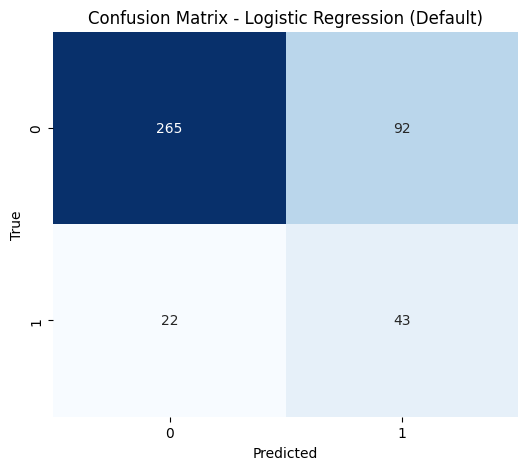

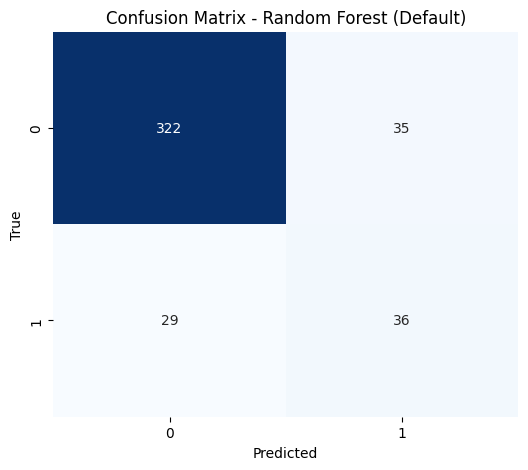

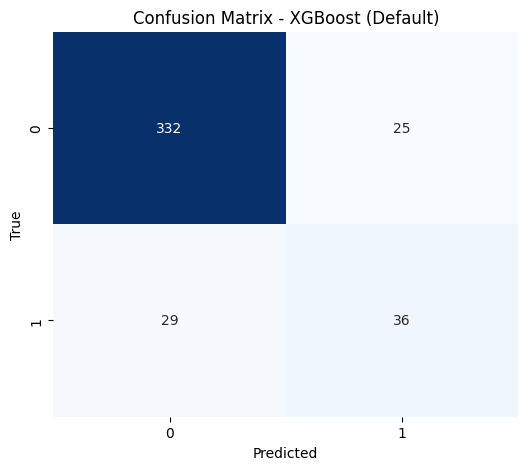

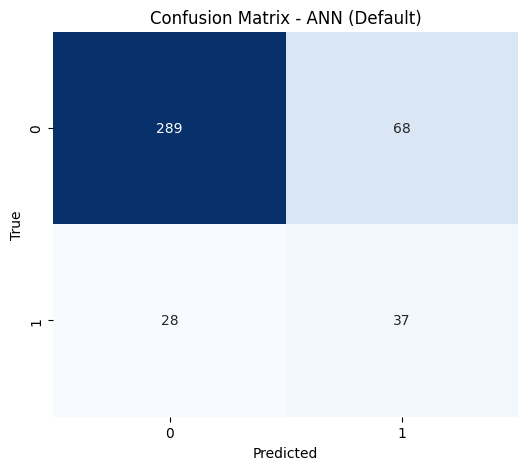

✅ Confusion Matrices - Tuned Models


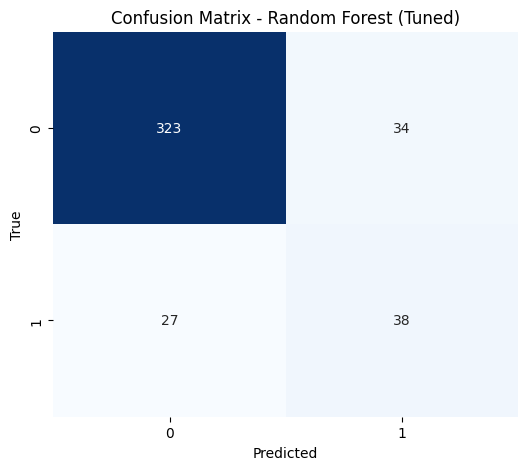

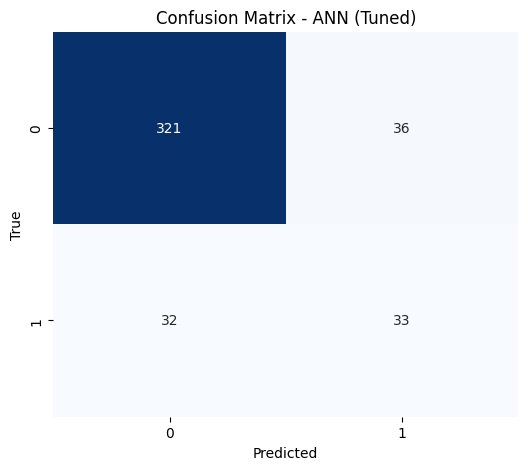

In [43]:
# 📈 Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# 📋 Default models confusion matrices
print("✅ Confusion Matrices - Default Models")

y_pred_logreg_default = logreg_kc1_default.predict(X_test_kc1)
plot_confusion_matrix(y_test_kc1, y_pred_logreg_default, "Logistic Regression (Default)")

y_pred_rf_default = rf_kc1_default.predict(X_test_kc1)
plot_confusion_matrix(y_test_kc1, y_pred_rf_default, "Random Forest (Default)")

y_pred_xgb_default = xgb_kc1_default.predict(X_test_kc1)
plot_confusion_matrix(y_test_kc1, y_pred_xgb_default, "XGBoost (Default)")

y_pred_ann_default = ann_kc1_default.predict(X_test_kc1)
plot_confusion_matrix(y_test_kc1, y_pred_ann_default, "ANN (Default)")

# 📋 Tuned models confusion matrices
print("✅ Confusion Matrices - Tuned Models")

y_pred_rf_tuned = rf_kc1_tuned.predict(X_test_kc1)
plot_confusion_matrix(y_test_kc1, y_pred_rf_tuned, "Random Forest (Tuned)")

y_pred_ann_tuned = ann_kc1_tuned.predict(X_test_kc1)
plot_confusion_matrix(y_test_kc1, y_pred_ann_tuned, "ANN (Tuned)")


✅ Confusion Matrices - Default Models (JM1)


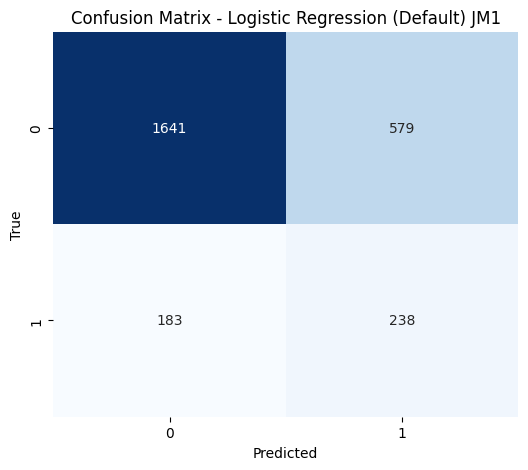

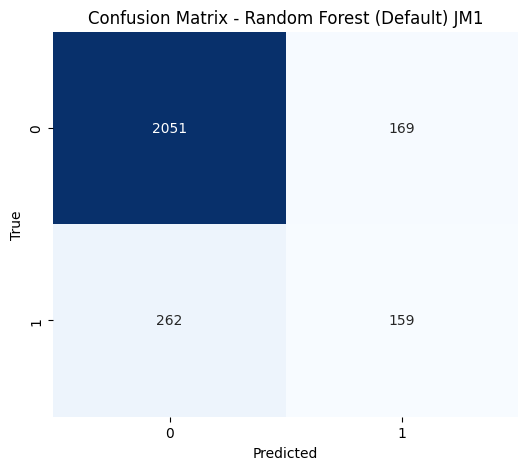

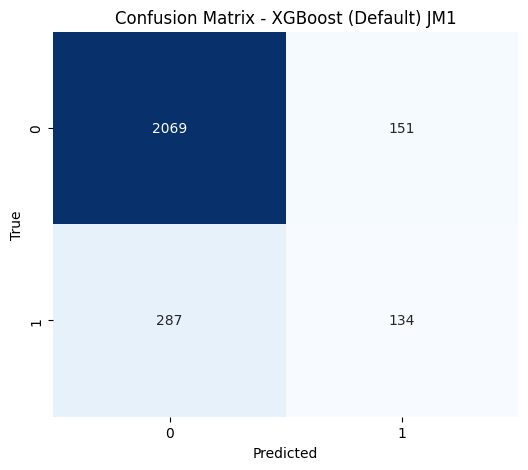

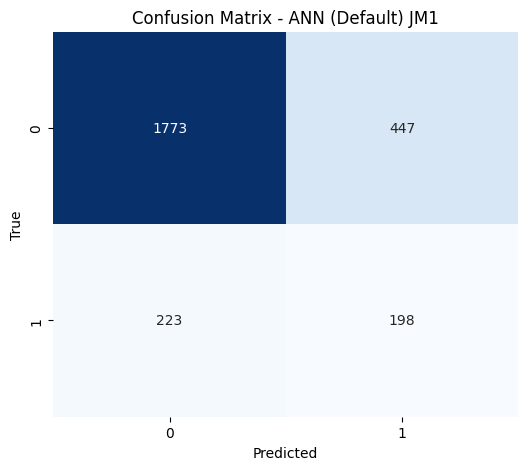

✅ Confusion Matrices - Tuned Models (JM1)


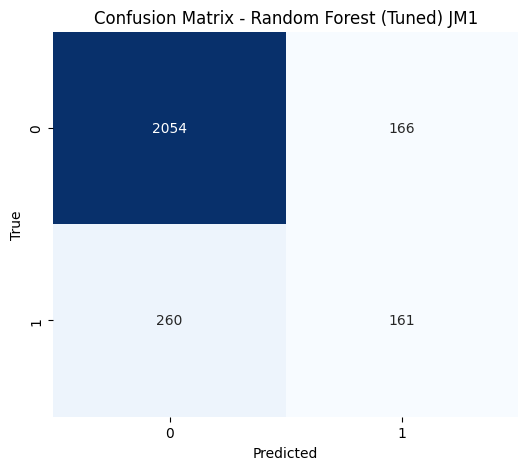

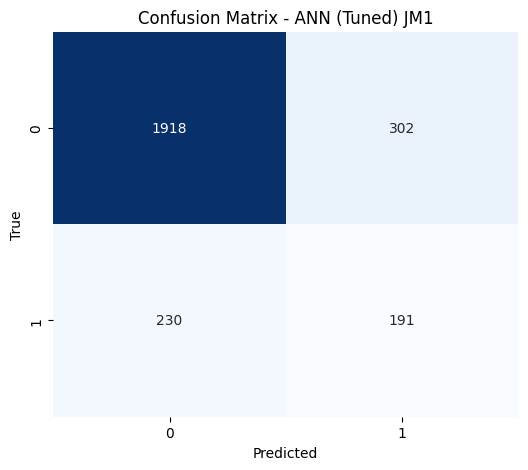

In [44]:
# 📋 Default models confusion matrices
print("✅ Confusion Matrices - Default Models (JM1)")

y_pred_logreg_default_jm1 = logreg_jm1_default.predict(X_test_jm1)
plot_confusion_matrix(y_test_jm1, y_pred_logreg_default_jm1, "Logistic Regression (Default) JM1")

y_pred_rf_default_jm1 = rf_jm1_default.predict(X_test_jm1)
plot_confusion_matrix(y_test_jm1, y_pred_rf_default_jm1, "Random Forest (Default) JM1")

y_pred_xgb_default_jm1 = xgb_jm1_default.predict(X_test_jm1)
plot_confusion_matrix(y_test_jm1, y_pred_xgb_default_jm1, "XGBoost (Default) JM1")

y_pred_ann_default_jm1 = ann_jm1_default.predict(X_test_jm1)
plot_confusion_matrix(y_test_jm1, y_pred_ann_default_jm1, "ANN (Default) JM1")

# 📋 Tuned models confusion matrices
print("✅ Confusion Matrices - Tuned Models (JM1)")

y_pred_rf_tuned_jm1 = rf_jm1_tuned.predict(X_test_jm1)
plot_confusion_matrix(y_test_jm1, y_pred_rf_tuned_jm1, "Random Forest (Tuned) JM1")

y_pred_ann_tuned_jm1 = ann_jm1_tuned.predict(X_test_jm1)
plot_confusion_matrix(y_test_jm1, y_pred_ann_tuned_jm1, "ANN (Tuned) JM1")


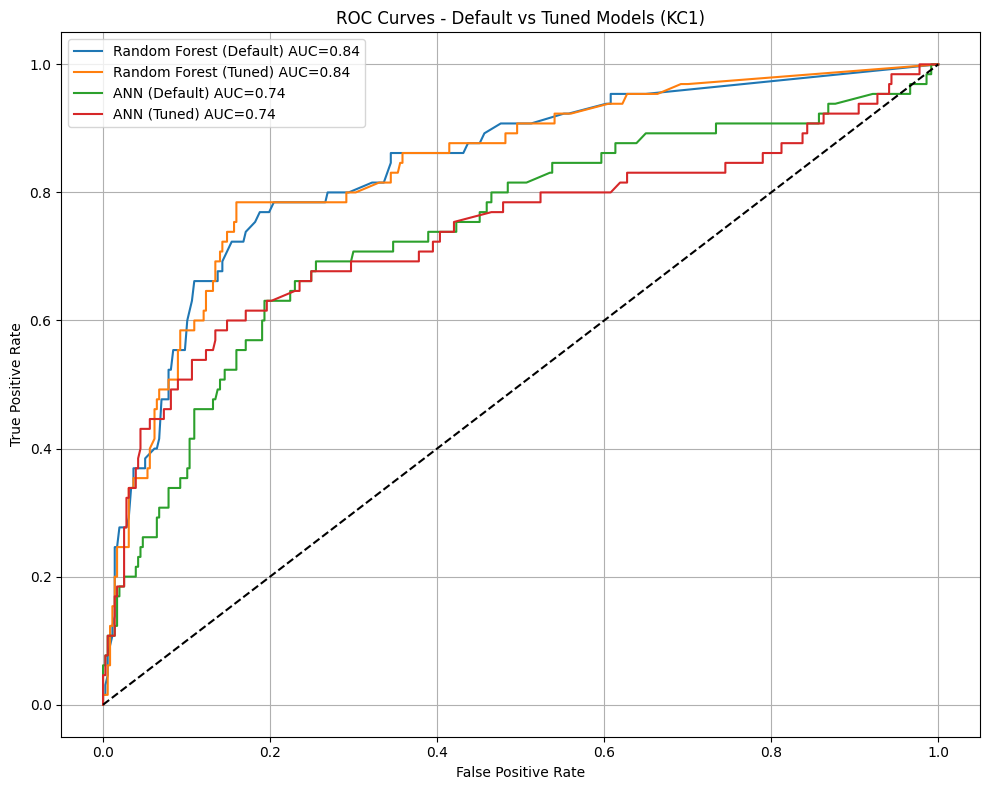

In [45]:
# 📈 ROC Curves for Default vs Tuned models

# Predict probabilities
y_prob_rf_default = rf_kc1_default.predict_proba(X_test_kc1)[:, 1]
y_prob_rf_tuned = rf_kc1_tuned.predict_proba(X_test_kc1)[:, 1]

y_prob_ann_default = ann_kc1_default.predict_proba(X_test_kc1)[:, 1]
y_prob_ann_tuned = ann_kc1_tuned.predict_proba(X_test_kc1)[:, 1]

# ROC curves
fpr_rf_default, tpr_rf_default, _ = roc_curve(y_test_kc1, y_prob_rf_default)
fpr_rf_tuned, tpr_rf_tuned, _ = roc_curve(y_test_kc1, y_prob_rf_tuned)

fpr_ann_default, tpr_ann_default, _ = roc_curve(y_test_kc1, y_prob_ann_default)
fpr_ann_tuned, tpr_ann_tuned, _ = roc_curve(y_test_kc1, y_prob_ann_tuned)

# AUC scores
auc_rf_default = roc_auc_score(y_test_kc1, y_prob_rf_default)
auc_rf_tuned = roc_auc_score(y_test_kc1, y_prob_rf_tuned)

auc_ann_default = roc_auc_score(y_test_kc1, y_prob_ann_default)
auc_ann_tuned = roc_auc_score(y_test_kc1, y_prob_ann_tuned)

# Plot
plt.figure(figsize=(10,8))
plt.plot(fpr_rf_default, tpr_rf_default, label=f'Random Forest (Default) AUC={auc_rf_default:.2f}')
plt.plot(fpr_rf_tuned, tpr_rf_tuned, label=f'Random Forest (Tuned) AUC={auc_rf_tuned:.2f}')
plt.plot(fpr_ann_default, tpr_ann_default, label=f'ANN (Default) AUC={auc_ann_default:.2f}')
plt.plot(fpr_ann_tuned, tpr_ann_tuned, label=f'ANN (Tuned) AUC={auc_ann_tuned:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Default vs Tuned Models (KC1)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


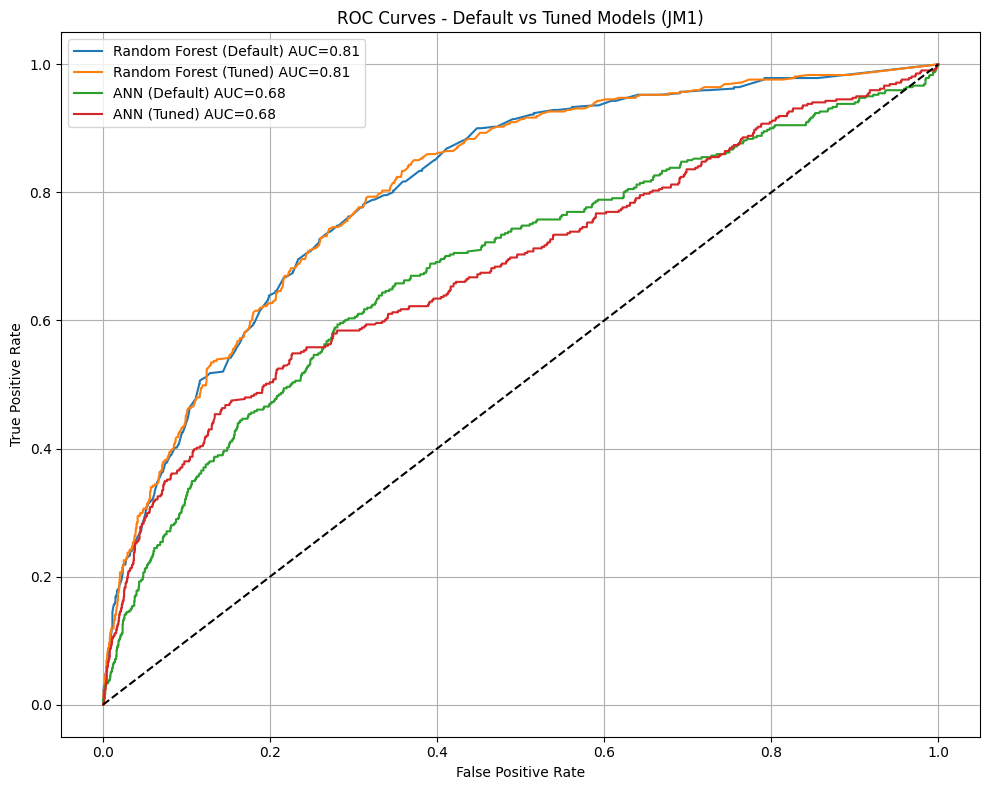

In [46]:
# 📈 ROC Curves for Default vs Tuned models (JM1)

# Predict probabilities
y_prob_rf_default_jm1 = rf_jm1_default.predict_proba(X_test_jm1)[:, 1]
y_prob_rf_tuned_jm1 = rf_jm1_tuned.predict_proba(X_test_jm1)[:, 1]

y_prob_ann_default_jm1 = ann_jm1_default.predict_proba(X_test_jm1)[:, 1]
y_prob_ann_tuned_jm1 = ann_jm1_tuned.predict_proba(X_test_jm1)[:, 1]

# ROC curves
fpr_rf_default_jm1, tpr_rf_default_jm1, _ = roc_curve(y_test_jm1, y_prob_rf_default_jm1)
fpr_rf_tuned_jm1, tpr_rf_tuned_jm1, _ = roc_curve(y_test_jm1, y_prob_rf_tuned_jm1)

fpr_ann_default_jm1, tpr_ann_default_jm1, _ = roc_curve(y_test_jm1, y_prob_ann_default_jm1)
fpr_ann_tuned_jm1, tpr_ann_tuned_jm1, _ = roc_curve(y_test_jm1, y_prob_ann_tuned_jm1)

# AUC scores
auc_rf_default_jm1 = roc_auc_score(y_test_jm1, y_prob_rf_default_jm1)
auc_rf_tuned_jm1 = roc_auc_score(y_test_jm1, y_prob_rf_tuned_jm1)

auc_ann_default_jm1 = roc_auc_score(y_test_jm1, y_prob_ann_default_jm1)
auc_ann_tuned_jm1 = roc_auc_score(y_test_jm1, y_prob_ann_tuned_jm1)

# Plot
plt.figure(figsize=(10,8))
plt.plot(fpr_rf_default_jm1, tpr_rf_default_jm1, label=f'Random Forest (Default) AUC={auc_rf_default_jm1:.2f}')
plt.plot(fpr_rf_tuned_jm1, tpr_rf_tuned_jm1, label=f'Random Forest (Tuned) AUC={auc_rf_tuned_jm1:.2f}')
plt.plot(fpr_ann_default_jm1, tpr_ann_default_jm1, label=f'ANN (Default) AUC={auc_ann_default_jm1:.2f}')
plt.plot(fpr_ann_tuned_jm1, tpr_ann_tuned_jm1, label=f'ANN (Tuned) AUC={auc_ann_tuned_jm1:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Default vs Tuned Models (JM1)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
